In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint as pp
import csv
import datetime
from dateutil.parser import parse
from pandas.tools.plotting import scatter_matrix

%matplotlib inline


In [30]:
complete_df = pd.read_csv("complete.csv")
complete_df.describe()


,opening_weekend,foreign_gross,posts_score,comments_score
count,1.543000e+03,1.479000e+03,1543.000000,1543.000000
mean,1.442541e+07,6.940496e+07,3335.982502,19722.269605
std,2.272687e+07,1.361247e+08,5594.419504,39616.307357
min,9.200000e+01,1.460000e+02,0.000000,-1.000000
25%,1.356860e+05,2.203883e+06,64.000000,297.000000
50%,6.842220e+06,1.760000e+07,539.000000,2697.000000
75%,1.893775e+07,7.329502e+07,3941.500000,18385.500000
max,2.074387e+08,2.027457e+09,34121.000000,394250.000000


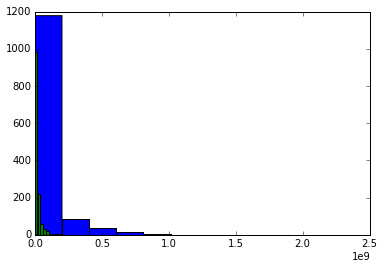

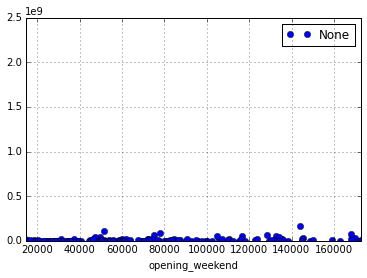

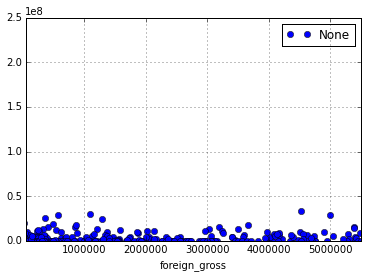

In [51]:
complete_df = complete_df[np.isfinite(complete_df['foreign_gross'])]
complete_df = complete_df[np.isfinite(complete_df['opening_weekend'])]
plt.hist(complete_df["foreign_gross"])
plt.hist(complete_df["opening_weekend"])

complete_df.plot(x="opening_weekend", y="foreign_gross", style='o')
complete_df.plot(x="foreign_gross", y="opening_weekend", style='o')

In [78]:
complete_df = complete_df[np.isfinite(complete_df['foreign_gross'])]
complete_df = complete_df[np.isfinite(complete_df['opening_weekend'])]
complete_df = complete_df[np.isfinite(complete_df['comments_score'])]
complete_df = complete_df[np.isfinite(complete_df['posts_score'])]

complete_df["opening_weekend"] = complete_df["opening_weekend"].apply(lambda x: int(x))
complete_df["foreign_gross"] = complete_df["foreign_gross"].apply(lambda x: int(x))
complete_df["release_date"] = complete_df["release_date"].apply(lambda x: parse(x).date())

complete_df = complete_df[complete_df['comments_score']>0]
complete_df = complete_df[complete_df['posts_score']>0]

complete_df["reddit_buzz"]=complete_df['comments_score']*complete_df["posts_score"]
complete_df = complete_df[complete_df['reddit_buzz']>0]

plt.hist(complete_df["foreign_gross"])
plt.hist(complete_df["opening_weekend"])

complete_df.plot(x="opening_weekend", y="foreign_gross", style='o')
complete_df.plot(x="foreign_gross", y="opening_weekend", style='o')

AttributeError: 'datetime.date' object has no attribute 'read'

,opening_weekend,foreign_gross,posts_score,comments_score,reddit_buzz,foreign_fross,optimus_mine
count,1.321000e+03,1.321000e+03,1321.000000,1321.000000,1.321000e+03,1.321000e+03,1.321000e+03
mean,1.622696e+07,7.639882e+07,3781.728236,22379.294474,2.861537e+08,7.639882e+07,3.023807e+08
std,2.382976e+07,1.416361e+08,5831.615975,41666.185813,8.416874e+08,1.416361e+08,8.475381e+08
min,2.260000e+02,2.790000e+02,1.000000,1.000000,1.000000e+00,2.790000e+02,6.410000e+02
25%,2.231190e+05,3.971971e+06,143.000000,718.000000,1.024100e+05,3.971971e+06,6.265184e+06
50%,8.754168e+06,2.222315e+07,908.000000,4122.000000,3.750796e+06,2.222315e+07,2.303226e+07
75%,2.105817e+07,8.260000e+07,4826.000000,22323.000000,1.147741e+08,8.260000e+07,1.321670e+08
max,2.074387e+08,2.027457e+09,34121.000000,394250.000000,9.560568e+09,2.027457e+09,9.562362e+09


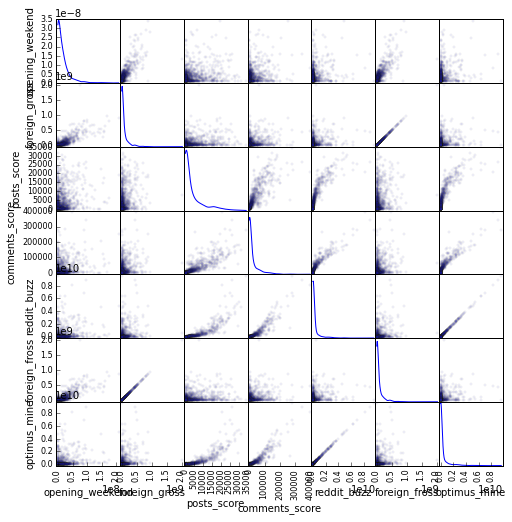

In [77]:
complete_df["optimus_mine"]=complete_df["reddit_buzz"]+complete_df["opening_weekend"]
scatter_matrix(complete_df, alpha=0.05, figsize=(8,8), diagonal='kde')
complete_df.describe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c79e610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1214e4290>]], dtype=object)

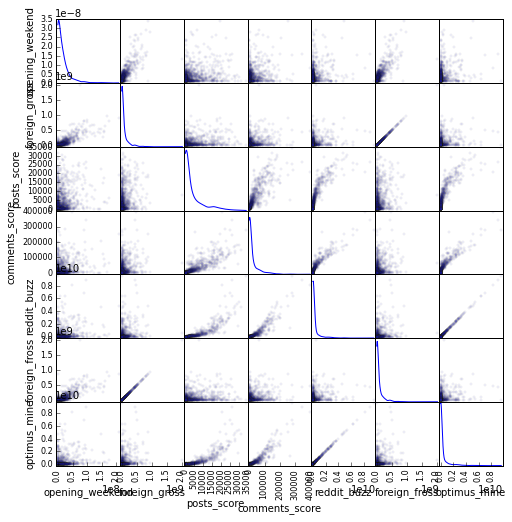

In [82]:
o_w_mean = 1.622696e+07
r_buzz =8.416874e+08
'2011' > '2010'
new_df = complete_df[ complete_df["release_date"] >= parse("2011-01-01").date() ]
scatter_matrix(complete_df, alpha=0.05, figsize=(8,8), diagonal='kde')
